# Vectorization

In [1]:
import warnings
warnings.filterwarnings("ignore")                     #Ignoring unnecessory warnings
from tqdm import tqdm
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import itertools

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# camera_train = pd.read_csv('./preprocess/processed_train/camera_train.csv',sep = '\t')
# grocery_train = pd.read_csv('./preprocess/processed_train/grocery_train.csv',sep = '\t')
# watches_train = pd.read_csv('./preprocess/processed_train/watches_train.csv',sep = '\t')
# videogames_train = pd.read_csv('./preprocess/processed_train/videogames_train.csv',sep = '\t')
full_train = pd.read_csv('./preprocess/processed_train/full_train_data.csv',sep = '\t')
full_train.head()

,Unnamed: 0,product_category,review_body,sentiment_actual,processed
0,0,Camera,Works well with my Nikon D610. The range is a ...,pos,work well nikon d610 rang littl short though p...
1,1,Camera,"Wow, construction of this bag is second to non...",pos,wow construct bag second none plenti storag la...
2,2,Camera,i should have put system in a long time ago. ...,pos,put system long time ago pleas result instal p...
3,3,Camera,"So, I'm new to the arca swiss world. And my bo...",pos,so i'm new arca swiss world boss introduc real...
4,4,Camera,"Great camera, now if I can learn all its finer...",pos,great camera learn finer point turn one grands...


In [3]:
# camera_test = pd.read_csv('./preprocess/processed_test/camera_test.csv',sep = '\t')
# grocery_test = pd.read_csv('./preprocess/processed_test/grocery_test.csv',sep = '\t')
# watches_test = pd.read_csv('./preprocess/processed_test/watches_test.csv',sep = '\t')
# videogames_test = pd.read_csv('./preprocess/processed_test/videogames_test.csv',sep = '\t')
full_test = pd.read_csv('./preprocess/processed_test/full_test_data.csv',sep = '\t')
full_test.head()

,Unnamed: 0,product_category,review_body,sentiment_actual,processed
0,0,Camera,I've had this Fuji 2800 camera for about 1 mon...,pos,i'v fuji 2800 camera 1 month simpli love it to...
1,1,Camera,great camera .......<br />works perfectly the ...,pos,great camera work perfect way want look awesom
2,2,Camera,I did quite a bit of shopping around before bu...,pos,quit bit shop around buy camera could not happ...
3,3,Camera,works,pos,work
4,4,Camera,This is a very simple clamp that works exactly...,pos,simpl clamp work exact should depend posit cla...


## Full train/test label and feature

In [4]:
# Get labels
full_train['sentiment_actual'] = full_train.sentiment_actual.map({'neg': 0, 'pos': 1})
full_train_label = full_train['sentiment_actual']


full_test['sentiment_actual'] = full_test.sentiment_actual.map({'neg': 0, 'pos': 1})
full_test_label = full_test['sentiment_actual']


In [5]:
train_texts = full_train['processed'].astype('U')
test_texts = full_test['processed'].astype('U')

count_vect = CountVectorizer()  
train_counts = count_vect.fit_transform(train_texts)
test_counts = count_vect.transform(test_texts)

transformer = TfidfTransformer()

transformer = transformer.fit(train_counts)
transformer = transformer.fit(test_counts)

train_features = transformer.transform(train_counts)
test_features = transformer.transform(test_counts)

In [6]:
print(train_features.shape[0])
print(full_train_label.shape[0])
print(test_features.shape[0])
print(full_test_label.shape[0])

400000
400000
79838
79838


## Binary Classification

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

### Naive bayes

In [8]:
naivebayes = MultinomialNB()
naivebayes.fit(train_features, full_train_label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [9]:
predict_nb = naivebayes.predict(test_features)

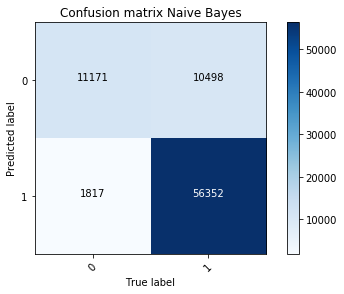

In [10]:
cm_nb = confusion_matrix(predict_nb, full_test_label)
plot_confusion_matrix(cm_nb, classes=naivebayes.classes_.tolist(),
                      title='Confusion matrix Naive Bayes')
plt.show()

In [11]:
print(np.mean(predict_nb == full_test_label)) 

0.8457501440416844


### Logistic regression

In [12]:
logregression = LogisticRegression()
logregression.fit(train_features, full_train_label)
predict_lr = logregression.predict(test_features)

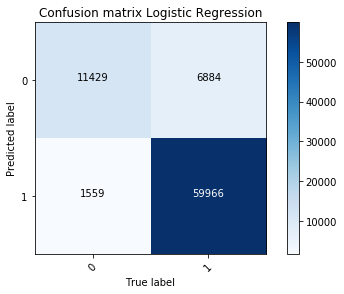

In [13]:
cm_lr = confusion_matrix(predict_lr, full_test_label)
plot_confusion_matrix(cm_lr, classes=logregression.classes_.tolist(),
                      title='Confusion matrix Logistic Regression')
plt.show()

In [14]:
print(np.mean(predict_lr == full_test_label)) 

0.8942483529146522


## Individual class